In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

In [3]:
# Load the data.
data = loadmat('EEG-5.mat')    # Load the EEG data
EEG = data['EEG'].reshape(-1)  # Extract the EEG variable
t = data['t'][0]  

$\textbf{2 i. What is the sampling interval?}$

In [4]:
dt = t[1] - t[0]
print('The sampling interval is', dt)

The sampling interval is 0.001


$\textbf{2 ii. What is the total duration of the recording (T)}$

In [5]:
#sampling frequency
f0 = 1/dt

#number of points in the data (N)
N = np.size(EEG)

# What is the total time of the observation (T)?
T = N * dt
print('The total duration of the recording is', T, 'second')

The total duration of the recording is 2.0 second


$\textbf{2 iii. What is the frequency resolution (df)?}$

$\textbf{2 iv. What is the nyquist frequency (fNQ)?}$

In [6]:
fNQ = f0/2
df = 1/T

print('The Nyquist frequency is', fNQ)
print('The frequency resolution is', df)

The Nyquist frequency is 500.0
The frequency resolution is 0.5


$\textbf{2 v. Plot the data and visually inspect it.}$ Describe briefly (in a sentence or two) what rhythms - if any - you see in the data. 

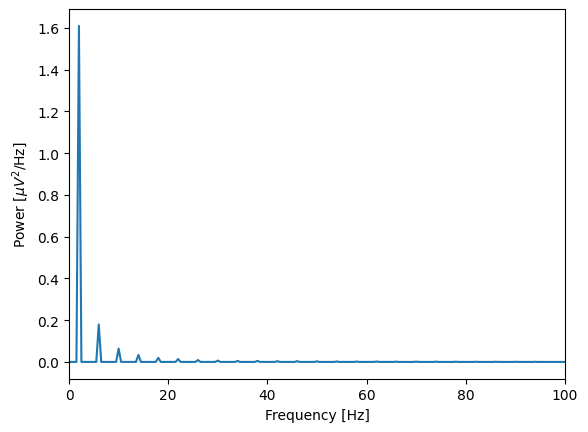

In [7]:
#frequency axis
fj  = np.arange(0,fNQ,df)

x = EEG
X = np.ndarray(np.size(fj), complex);
for j in range( np.size(fj) ):
    X[j] = np.sum(x * np.exp(-2 * np.pi * 1j * fj[j] * t)) #1j is the square root of -1; replaces i in our Xj formula 

# And the spectrum,
Sxx = 2*dt**2/T * X * np.conj(X) #Sxx at frequency index j 

# Plot
plt.plot(fj, Sxx.real)
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                
plt.ylabel('Power [$\mu V^2$/Hz]');
plt.show()

DO YOU SEE RHYTHMNS?

$\textbf{2 vi. Plot the spectrum versus frequency.}$ You may choose to plot the spectrum on a decibel scale, or not. Defend your choice!

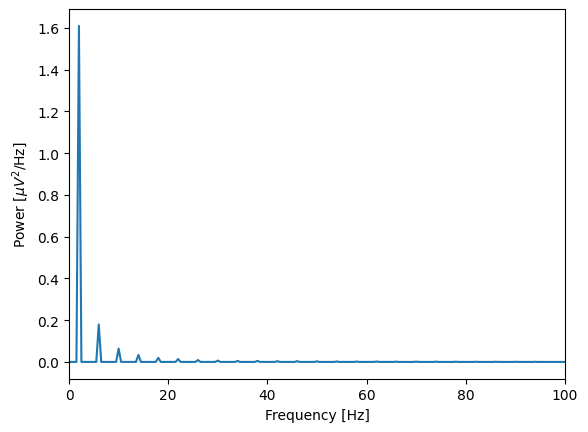

In [8]:
# Compute the power spectrum using the FFT function.
#Define useful quantities
dt = t[2]-t[1]
f0 = 1/dt
N = np.size(EEG)
T = N*dt

x  = EEG
xf = np.fft.fft(x)                        # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[0:int(N / 2)].real              # Ignore negative frequencies

# Define the frequency axis
df = 1/T                     # Determine frequency resolution
fNQ = f0 / 2                 # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)  # Construct frequency axis

# Plot the spectrum versus frequency.
plt.plot(faxis, Sxx)                        #plt.plot(faxis, 10*np.log10(Sxx))  for decibels
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]');

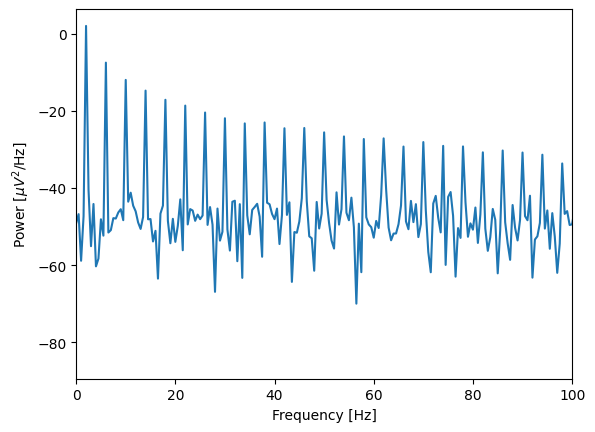

In [9]:
plt.plot(faxis, 10*np.log10(Sxx))  #for decibels
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]');

I chose to plot using a decibel scale because the decibal scale emphasizes lower-amplitutde rhythmns that may be hiden by large-amplitude oscillations. By changing the scale of the spectrum to decibel, we uncovered what looks like rythmitic activity from this dataset. 

$\textbf{2 vii. Plot the spectrogram as a function of frequency and time.}$ You will need to choose the interval size and the overlap between intervals. Do the rhythms in these data appear to change in time?

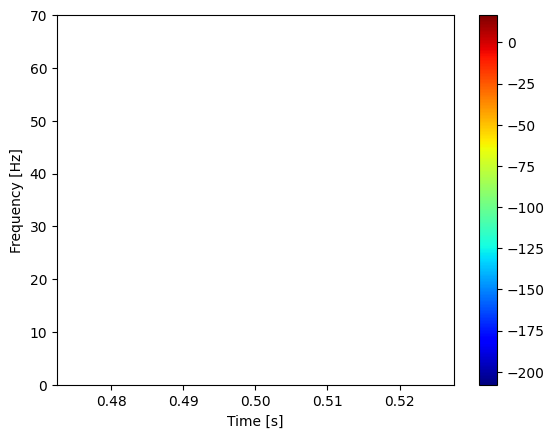

In [4]:
# Plot the spectrogram.

Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f0, t0, Sxx0 = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
plt.pcolormesh(t0, f0, 10 * np.log10(Sxx0),
               cmap='jet')# Plot the result
plt.colorbar()            # ... with a color bar,
plt.ylim([0, 70])             # ... set the frequency range,
plt.xlabel('Time [s]')       # ... and label the axes
plt.ylabel('Frequency [Hz]');

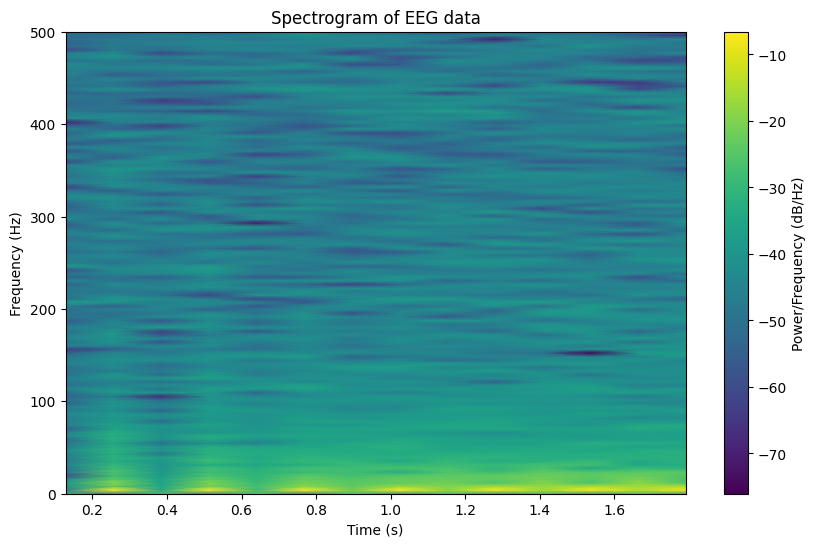

In [10]:
window_size = 256
overlap = 128

#compute spectrogram
f, t, Sxx = spectrogram(EEG, fs=1/dt, nperseg=window_size, noverlap = overlap, nfft = 256 ) #nfft much be the same value as window size 

#plot spectrogram
plt.figure(figsize = (10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud') #plot in decibels with gouraud shading
plt.colorbar(label = 'Power/Frequency (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of EEG data')
plt.show()

Do these rhythmns in the data appear to change over time?

The rhythmns in this data do appear to change over time. They are becoming more and then less negative throughout time. 

$\textbf{2 viii.)}$ Interpret (in a few sentences) the spectrum and spectrogram, and describe the rhythms present in the signal. Compare your visual inspection of the data to the spectrum results - do the analyses agree or disagree?

RESPOND HERE